# Introduction/Project Overview:
In this notebook, I will go over the World Health Organization Life Expectancy dataset. I found a version on kaggle that had been updated and had a higher usability score so I chose to use that. It is linked [here](https://www.kaggle.com/datasets/lashagoch/life-expectancy-who-updated) if you want to read more about it. The dataset contains information about a countries and its population, health issues, life expectancy, etc for a given year. Our goal would be to create a model that can accurately determine the life expectency given a some characteristics on a population. Throughout this notebook I will visualize the data, explain some data preprocessing techniques, construct and evaluate models and analyze the results.

### Data Exploration & Preprocessing:
I will go over the dataset, analyzing its various features, checking for missing values, and gaining insights into the distribution of variables. Prior to building the models, I will preprocess the data by handling missing values, encoding categorical variables, and scaling numerical features to ensure good model performance.

### Model Building & Evaluation:
In this notebook I will try implement a couple of models to try and see which ones are more accurate at predicting life expectancy. This is a supervised learning task since we are given the life expectancy of these population. Additionally this is a regression tasks because we are trying to predict a numerical value rather then put something into a category. For this notebook the models I chose is multiple linear regression, polynomial regression and a neural network. Lastly I will interpret the results of each model. 

### Conclusion:
Finally, I will be discussing potential areas for model improvement, what stood out to me and what were some challanges. The conclusion serves more as a reflection for me on my time working on this notebook. This will serve as a good test for me to keep learning and testing my skills. Lets get to it!

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

# Data Exploration & Preprocessing:
As mentioned earlier I got the dataset from kaggle. The link to that can be found above in the project overview. The download came with a csv file. Since I have it locally on my computer I can eassily access the data as shown below. Some of the first steps we will do before creating a model is to see what our data looks like.

In [2]:
data = pd.read_csv('./data.csv')

Lets take a look at the first couple of entries and the columns in our dataset.

In [3]:
data.head(5)

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Costa Rica,Central America and Caribbean,2006,9.8,11.2,95.2200,4.19,88,86,26.4,...,89,0.16,9110,4.35,2.0,1.9,7.9,0,1,78.2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2848 entries, 0 to 2847
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2848 non-null   object 
 1   Region                       2848 non-null   object 
 2   Year                         2848 non-null   int64  
 3   Infant_deaths                2848 non-null   float64
 4   Under_five_deaths            2848 non-null   float64
 5   Adult_mortality              2848 non-null   float64
 6   Alcohol_consumption          2848 non-null   float64
 7   Hepatitis_B                  2848 non-null   int64  
 8   Measles                      2848 non-null   int64  
 9   BMI                          2848 non-null   float64
 10  Polio                        2848 non-null   int64  
 11  Diphtheria                   2848 non-null   int64  
 12  Incidents_HIV                2848 non-null   float64
 13  GDP_per_capita    

So we have 21 columns in total. We have two categorical columns and 19 numeric columns. There dosen't seem to be any missing values but we will double check later.

Lets see what other information we can get at a glance from our data. 

In [5]:
data.describe()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
count,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000,2848.00000,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000
mean,2007.500000,30.510955,43.150456,192.962955,4.833032,84.21875,77.250351,25.023455,86.456110,86.227879,0.898862,11430.386938,36.840976,4.886763,4.921173,7.604951,0.202247,0.797753,68.789010
std,4.610582,27.545025,44.604702,114.837818,3.989790,16.00973,18.667562,2.196260,15.111162,15.566384,2.387287,16916.391089,136.851020,4.441881,4.528915,3.159514,0.401746,0.401746,9.388885
min,2000.000000,1.800000,2.300000,49.384000,0.000000,12.00000,10.000000,19.800000,8.000000,16.000000,0.010000,148.000000,0.080000,0.100000,0.100000,1.100000,0.000000,0.000000,39.400000
25%,2003.750000,8.200000,9.800000,108.346000,1.197500,78.00000,64.000000,23.200000,81.000000,81.000000,0.080000,1404.250000,2.070000,1.600000,1.600000,5.000000,0.000000,1.000000,62.675000
50%,2007.500000,19.800000,23.200000,164.422250,4.055000,89.00000,83.000000,25.500000,93.000000,93.000000,0.160000,4169.000000,7.925000,3.400000,3.400000,7.800000,0.000000,1.000000,71.300000
75%,2011.250000,47.725000,66.325000,248.099750,7.810000,96.00000,93.000000,26.400000,97.000000,97.000000,0.470000,12255.750000,23.850000,7.200000,7.300000,10.300000,0.000000,1.000000,75.400000
max,2015.000000,138.100000,224.900000,719.360500,17.870000,99.00000,99.000000,32.100000,99.000000,99.000000,21.680000,112418.000000,1379.860000,27.700000,28.600000,14.100000,1.000000,1.000000,83.800000


From the table we can see that
- the minimum life expectancy is 39 while the max is 83.
- The max adult mortality is 719 per thousand in population, while the min is 49.
- The average alcohol consumption per liters per capita is a lot lower than at I expected but the min is 0.00 which makes sense as some countries might have religious restrictions or laws against selling alchohol.
- Earliest recording is from 2000 and latest is 2015 

It is also very disturbing seeing the low immunization coverage for diseases such as polio, hepatitis b, and measles. Especially when the average immunization coverage is pretty high for them. Overall this table gives us some interesting information on the distribution of the data. Lets move on and see what other important things are on our data.

Below I am changing the column names to be lower case because they previously gave me issues the way it was originally formated. 

In [6]:
data.columns = data.columns.str.lower()

We are going to select the numerical and categorical columns so we can do some light data exploration.

In [7]:
numerical = data.select_dtypes(include=['float64', 'int64']).columns

In [8]:
categorical = data.select_dtypes(include=['object']).columns

Lets take a look at the averages of the numerical columns with respect to each of the regions.

In [9]:
pd.pivot_table(data, index='region', values=numerical)

,adult_mortality,alcohol_consumption,bmi,diphtheria,economy_status_developed,economy_status_developing,gdp_per_capita,hepatitis_b,incidents_hiv,infant_deaths,life_expectancy,measles,polio,population_mln,schooling,thinness_five_nine_years,thinness_ten_nineteen_years,under_five_deaths,year
region,,,,,,,,,,,,,,,,,,,
Africa,319.073434,2.980694,23.249265,75.992647,0.000000,1.000000,2314.009804,78.025735,2.702132,60.604044,57.847304,67.625000,76.205882,18.438395,4.593260,7.199142,7.270343,94.025000,2007.5
Asia,171.166565,2.401700,23.412269,87.942130,0.037037,0.962963,6560.958333,84.402778,0.139884,32.536111,69.454861,73.314815,88.194444,136.131782,7.375231,9.283796,8.833333,40.965278,2007.5
Central America and Caribbean,163.581169,5.623224,26.274671,90.878289,0.000000,1.000000,8387.812500,89.980263,0.419375,20.965461,72.437500,82.644737,91.049342,4.052237,7.808553,3.269737,3.304605,25.932237,2007.5
European Union,104.395392,10.791319,26.021528,95.678241,1.000000,0.000000,28140.368056,89.208333,0.073912,4.872222,77.715046,88.534722,95.530093,16.210046,11.064815,1.412037,1.408102,5.858333,2007.5
Middle East,114.658666,0.747702,26.943750,89.274038,0.000000,1.000000,18014.250000,87.721154,0.089760,17.598558,73.450962,82.956731,89.697115,20.288077,7.348558,6.109135,6.232692,21.633173,2007.5
North America,100.693844,7.053125,27.429167,93.729167,0.666667,0.333333,33783.854167,73.291667,0.127917,9.925000,77.841667,87.833333,92.854167,148.473958,11.035417,0.904167,0.989583,11.647917,2007.5
Oceania,162.886801,2.880239,27.203977,80.556818,0.181818,0.818182,10146.971591,80.664773,0.155284,26.305114,69.517614,70.971591,81.829545,3.230568,7.876705,1.922159,1.862500,32.493750,2007.5
Rest of Europe,138.582856,7.580083,25.991250,92.341667,0.266667,0.733333,19090.150000,87.366667,0.107292,9.627917,74.525417,89.954167,92.954167,20.065833,10.775417,1.990000,1.960833,11.179583,2007.5
South America,155.275326,5.745677,26.071875,89.625000,0.000000,1.000000,7232.031250,88.036458,0.298333,19.953646,72.780729,74.130208,89.427083,31.785260,8.022396,2.064583,2.154688,23.938021,2007.5


From the table above we can see that 
- Africa has the highest average of adult mortality
- North america has the lowest average of adult mortality, which is lower than I expected.
- Average bmi for each region seems to be all within the 20s.
- This dataset has the only region with all developed countries being european union
- Middle East, Most of the Americas and Africa are only developing countries. Which would be interesting to see what metrics they used for this back in 2015. What lead to this decision?
- North America has the highest average gdp per capita.
- Africa has the highest average infant deaths
- The highest average of life expecetancy is North America while the lowest is Africa

These are just some of the stuff I wanted to point out but theres a lot more interesting points in this table. The one thing im curious about is seeing the metric for deciding which countries are developed and which are not. The column is economy status as developing so its confusing why there are only developing countries in some regions. It seems a bit unfair.

Lets move on and take a look at the averages of the numerical columns with respect to each coutry.

In [10]:
pd.pivot_table(data, index='country', values=numerical)

,adult_mortality,alcohol_consumption,bmi,diphtheria,economy_status_developed,economy_status_developing,gdp_per_capita,hepatitis_b,incidents_hiv,infant_deaths,life_expectancy,measles,polio,population_mln,schooling,thinness_five_nine_years,thinness_ten_nineteen_years,under_five_deaths,year
country,,,,,,,,,,,,,,,,,,,
Afghanistan,265.804969,0.016125,22.46250,55.1250,0.0,1.0,408.5625,64.5625,0.022500,71.08125,59.65625,24.3750,55.3750,27.450625,2.90000,15.58125,16.58125,98.61250,2007.5
Albania,83.132969,4.696875,25.85625,98.0625,0.0,1.0,3071.1250,98.0000,0.025625,15.25625,75.95000,95.9375,98.1250,2.969375,9.24375,1.70000,1.61875,17.14375,2007.5
Algeria,113.439281,0.400625,24.86875,91.8750,0.0,1.0,3745.1250,88.3125,0.021875,26.75625,73.78750,93.2500,91.7500,34.820625,6.99375,5.97500,6.09375,31.19375,2007.5
Angola,297.844063,4.935625,22.51875,55.5625,0.0,1.0,2647.8125,68.8125,1.303750,88.76875,52.82500,64.0000,35.7500,21.623750,4.60625,6.66875,6.19375,144.16250,2007.5
Antigua and Barbuda,142.478813,7.755000,25.85000,98.3125,0.0,1.0,14678.7500,98.2500,0.125000,9.47500,75.35000,75.4375,96.9375,0.085000,9.01875,3.37500,3.42500,11.51875,2007.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Venezuela, RB",151.056156,7.458125,26.49375,75.2500,0.0,1.0,9294.8750,72.4375,0.400000,15.85000,72.79375,83.0000,79.1875,27.392500,8.23750,1.56250,1.65000,18.50000,2007.5
Vietnam,133.054406,1.742500,20.76250,91.7500,0.0,1.0,1807.8750,87.4375,0.196875,19.50000,74.33125,65.0000,94.9375,86.032500,6.90000,15.62500,14.92500,24.47500,2007.5
"Yemen, Rep.",239.653937,0.047000,23.02500,72.6250,0.0,1.0,2406.8125,60.1875,0.025000,52.44375,64.16250,95.0000,71.6250,21.730625,2.22500,13.75000,13.83125,69.57500,2007.5


I realized that there are way too many countries to do some analysis on. Theres a total of 178, I did not know that there was this many in the dataset. Regardless we can see that all these countries have distinct values. It would be interesting to see if we could possibly plot this. So lets go ahead and try. 

### Data Visualization
We are going to graph each country and color code it by region then also color code it by economy developed/developing status.

In [ ]:
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris

In [ ]:
pivoted = pd.pivot_table(data, index='country', values=numerical) # save pivot table

In [12]:
df = pd.DataFrame(pivoted.to_records()) # save to datatframe

In [33]:
X = df[df.select_dtypes(include=['float64', 'int64']).columns]
countries = df.country

In [16]:
n_samples = X.shape[0]
safe_perplexity = min(30, (n_samples - 1) // 3)

In [17]:
tsne = TSNE(n_components=3, random_state=42, perplexity=safe_perplexity)
X_tsne = tsne.fit_transform(X)

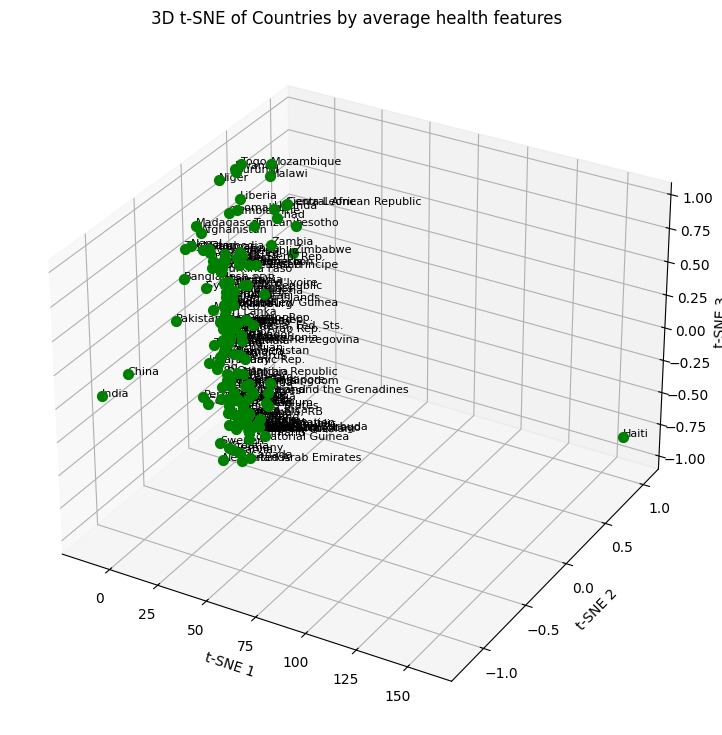

In [34]:
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

for i in range(n_samples):
    x, y, z = X_tsne[i]
    country = countries.iloc[i]
    ax.scatter(x, y, z, c=color, s=50)
    ax.text(x, y, z, country, fontsize=8)


ax.set_xlabel("t-SNE 1")
ax.set_ylabel("t-SNE 2")
ax.set_zlabel("t-SNE 3")
ax.set_title("3D t-SNE of Countries by average health features")
plt.show()
plt.show()

In [19]:
# select countries
countries = df['country']
# get encoding
df['economy_status'] = np.where(df['economy_status_developed'] == 1, 'Developed', 'Developing')

# get features (removes listed ones)
features = df.drop(columns=['country', 'economy_status'])

# align data with country and economy status
countries = df.loc[X.index, 'country']
statuses = df.loc[X.index, 'economy_status']

# safe perplexity
n_samples = len(X)
perplexity = min(30, (n_samples - 1) // 3)

tsne = TSNE(n_components=3, perplexity=perplexity, random_state=42)
X_tsne = tsne.fit_transform(X)

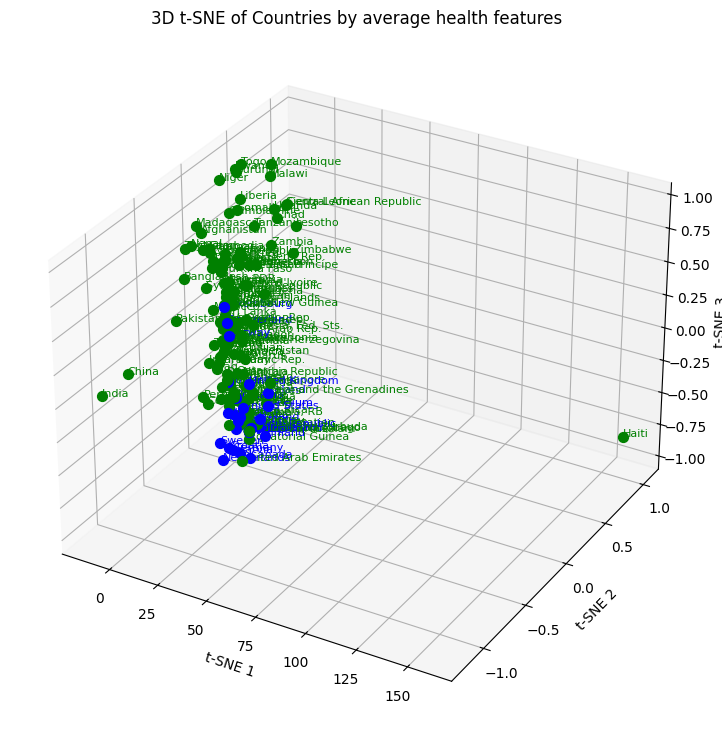

In [28]:
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
color_map = {'Developed': 'blue', 'Developing': 'green'}

for i in range(n_samples):
    x, y_, z = X_tsne[i]
    country = countries.iloc[i]
    status = statuses.iloc[i]
    color = color_map[status]
    
    ax.scatter(x, y_, z, c=color, s=50)
    ax.text(x, y_, z, country, fontsize=8, color=color)

# Axes and title
ax.set_xlabel("t-SNE 1")
ax.set_ylabel("t-SNE 2")
ax.set_zlabel("t-SNE 3")
ax.set_title("3D t-SNE of Countries by average health features")
plt.show()

Lastly lets look how the numerical columns look with respected to the economic status.

In [21]:
pd.pivot_table(data, index = 'economy_status_developed', values = ['adult_mortality', 'bmi', 'measles'])

,adult_mortality,bmi,measles
economy_status_developed,,,
0,217.432966,24.760519,74.500440
1,96.442355,26.060590,88.097222


Now we are going to be ploting life expectancy against all other numerical columns to see if there is a relationship. We are using life expectancy because this i

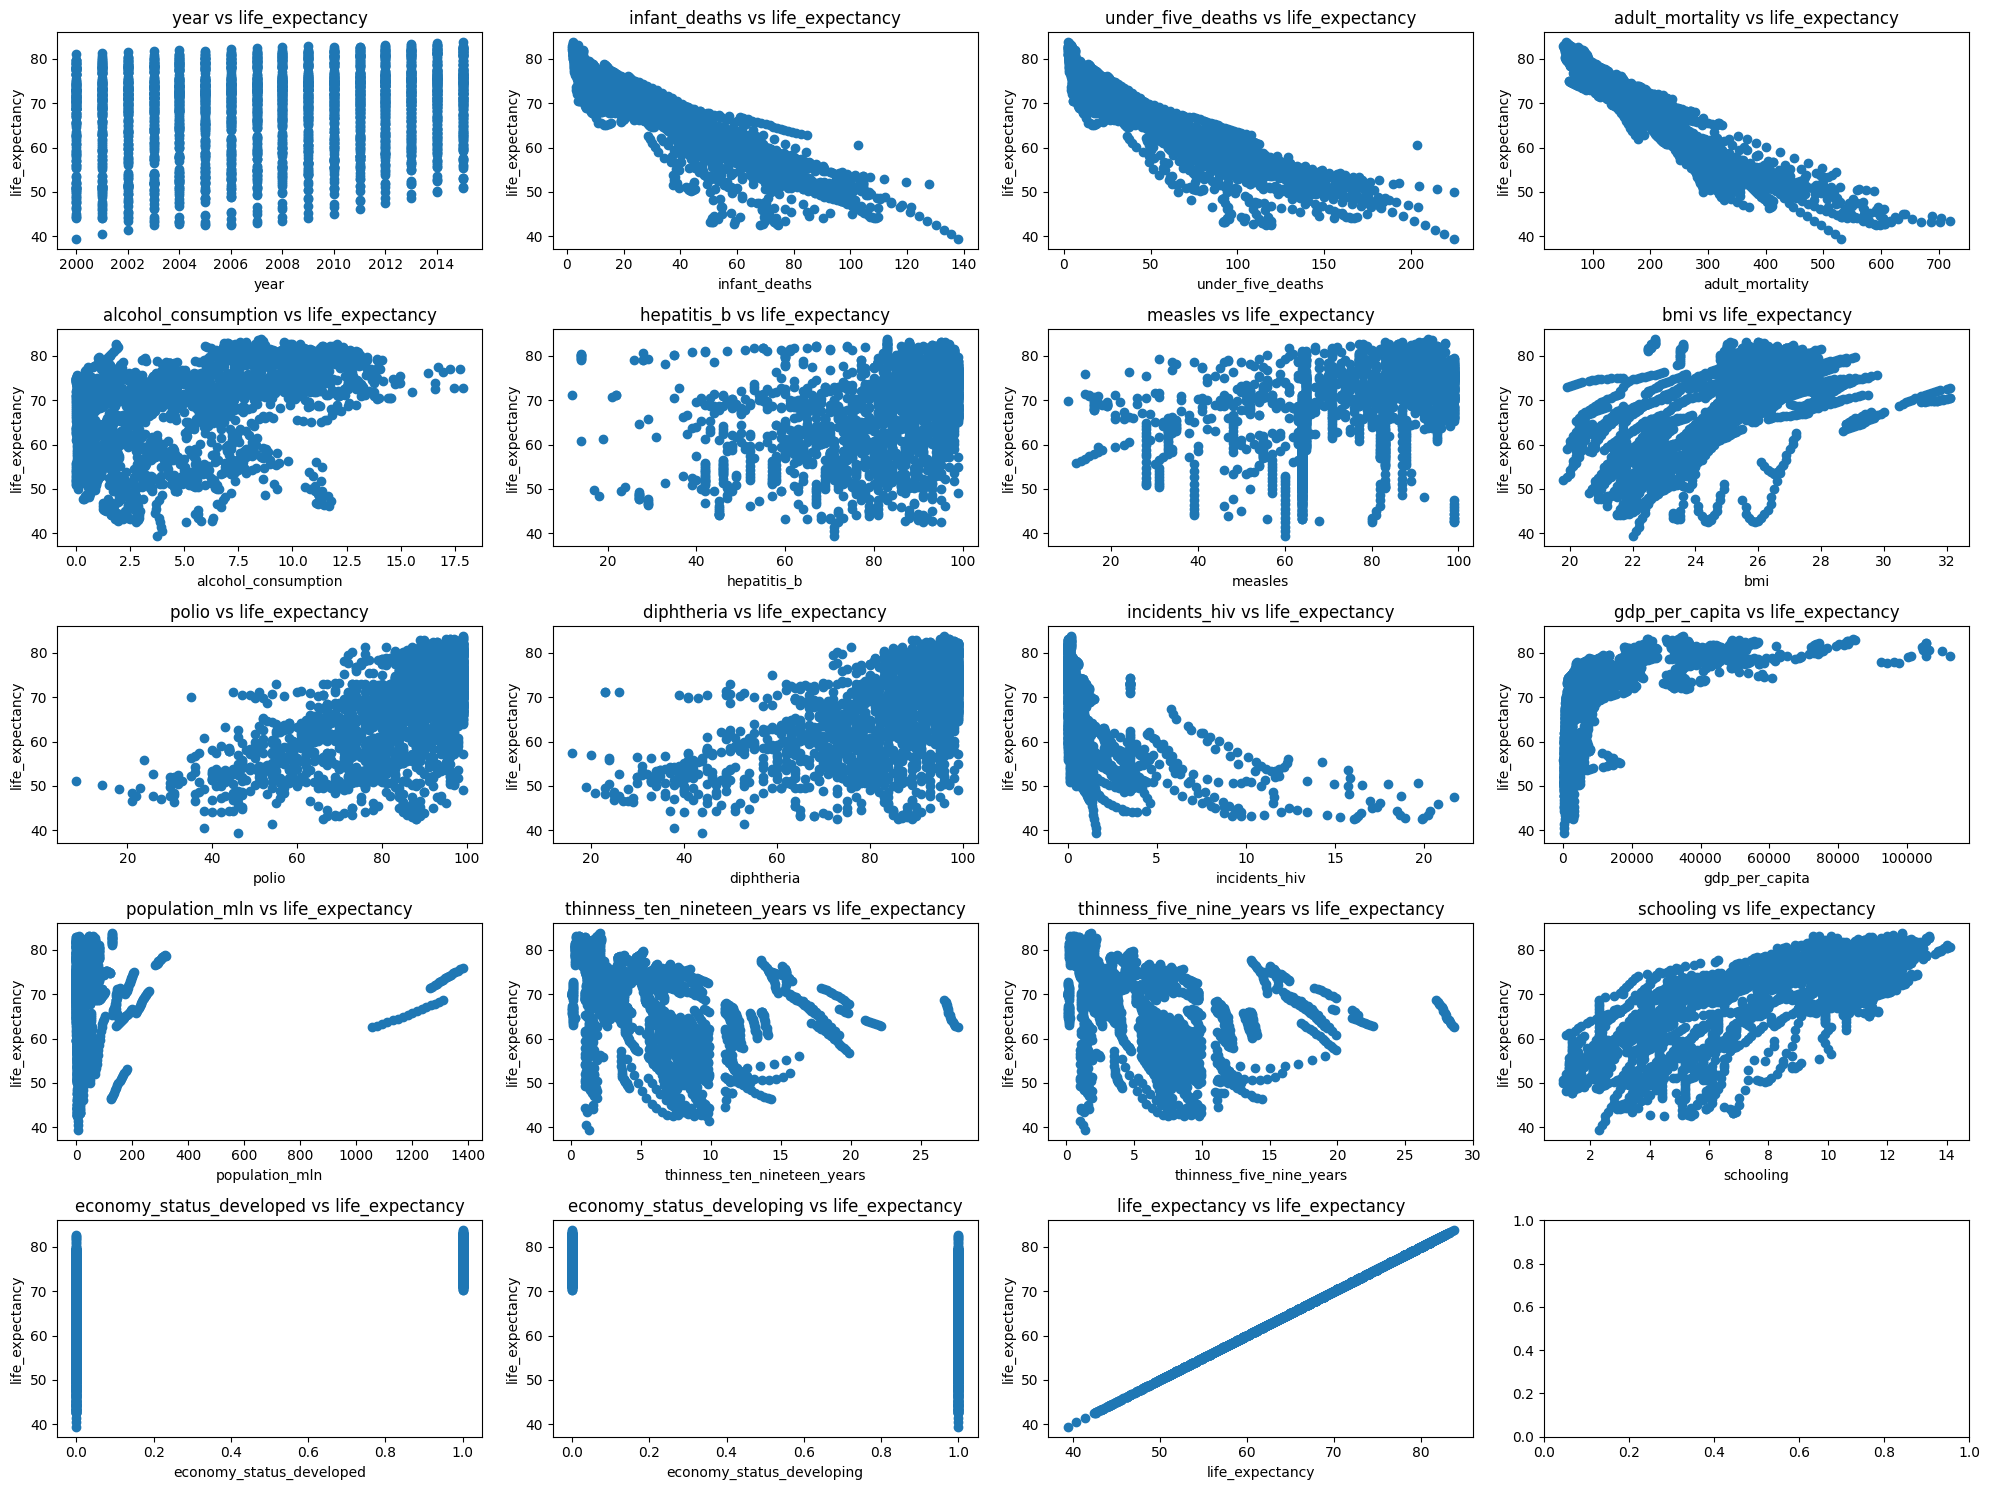

In [22]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 15))
axes = axes.flatten()
for i, col in enumerate(numerical):
    axes[i].scatter(data[col], data['life_expectancy'])  
    axes[i].set_title(f'{col} vs life_expectancy')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('life_expectancy')
plt.tight_layout()
plt.show()

From the graphs above there does not seem to be much of a relationship between life expectancy and the other columns in the dataset. By that I mean that there is no very noticable relationship.  The columns that seem to have some relationship are adult mortality (makes sense), infant deaths, percentage expenditure, under five deaths, hiv/aids, and income composition of resources. Of these adult mortality and income composition of resources seem to be the most coralated. It is also interesting to see infant deaths and under five deaths seem very similar. Same for the thiness columns.

Lastly there seems to be a group of populations that are constant in their life expectancy. For example if we look at income composition of resources we see that even at 0.0 the life expectancy changes up and down. This pattern can be seen through most graphs above. It might be some inconsistent or false reporting. 

Now we move on to graphing the distribution of the columns. 

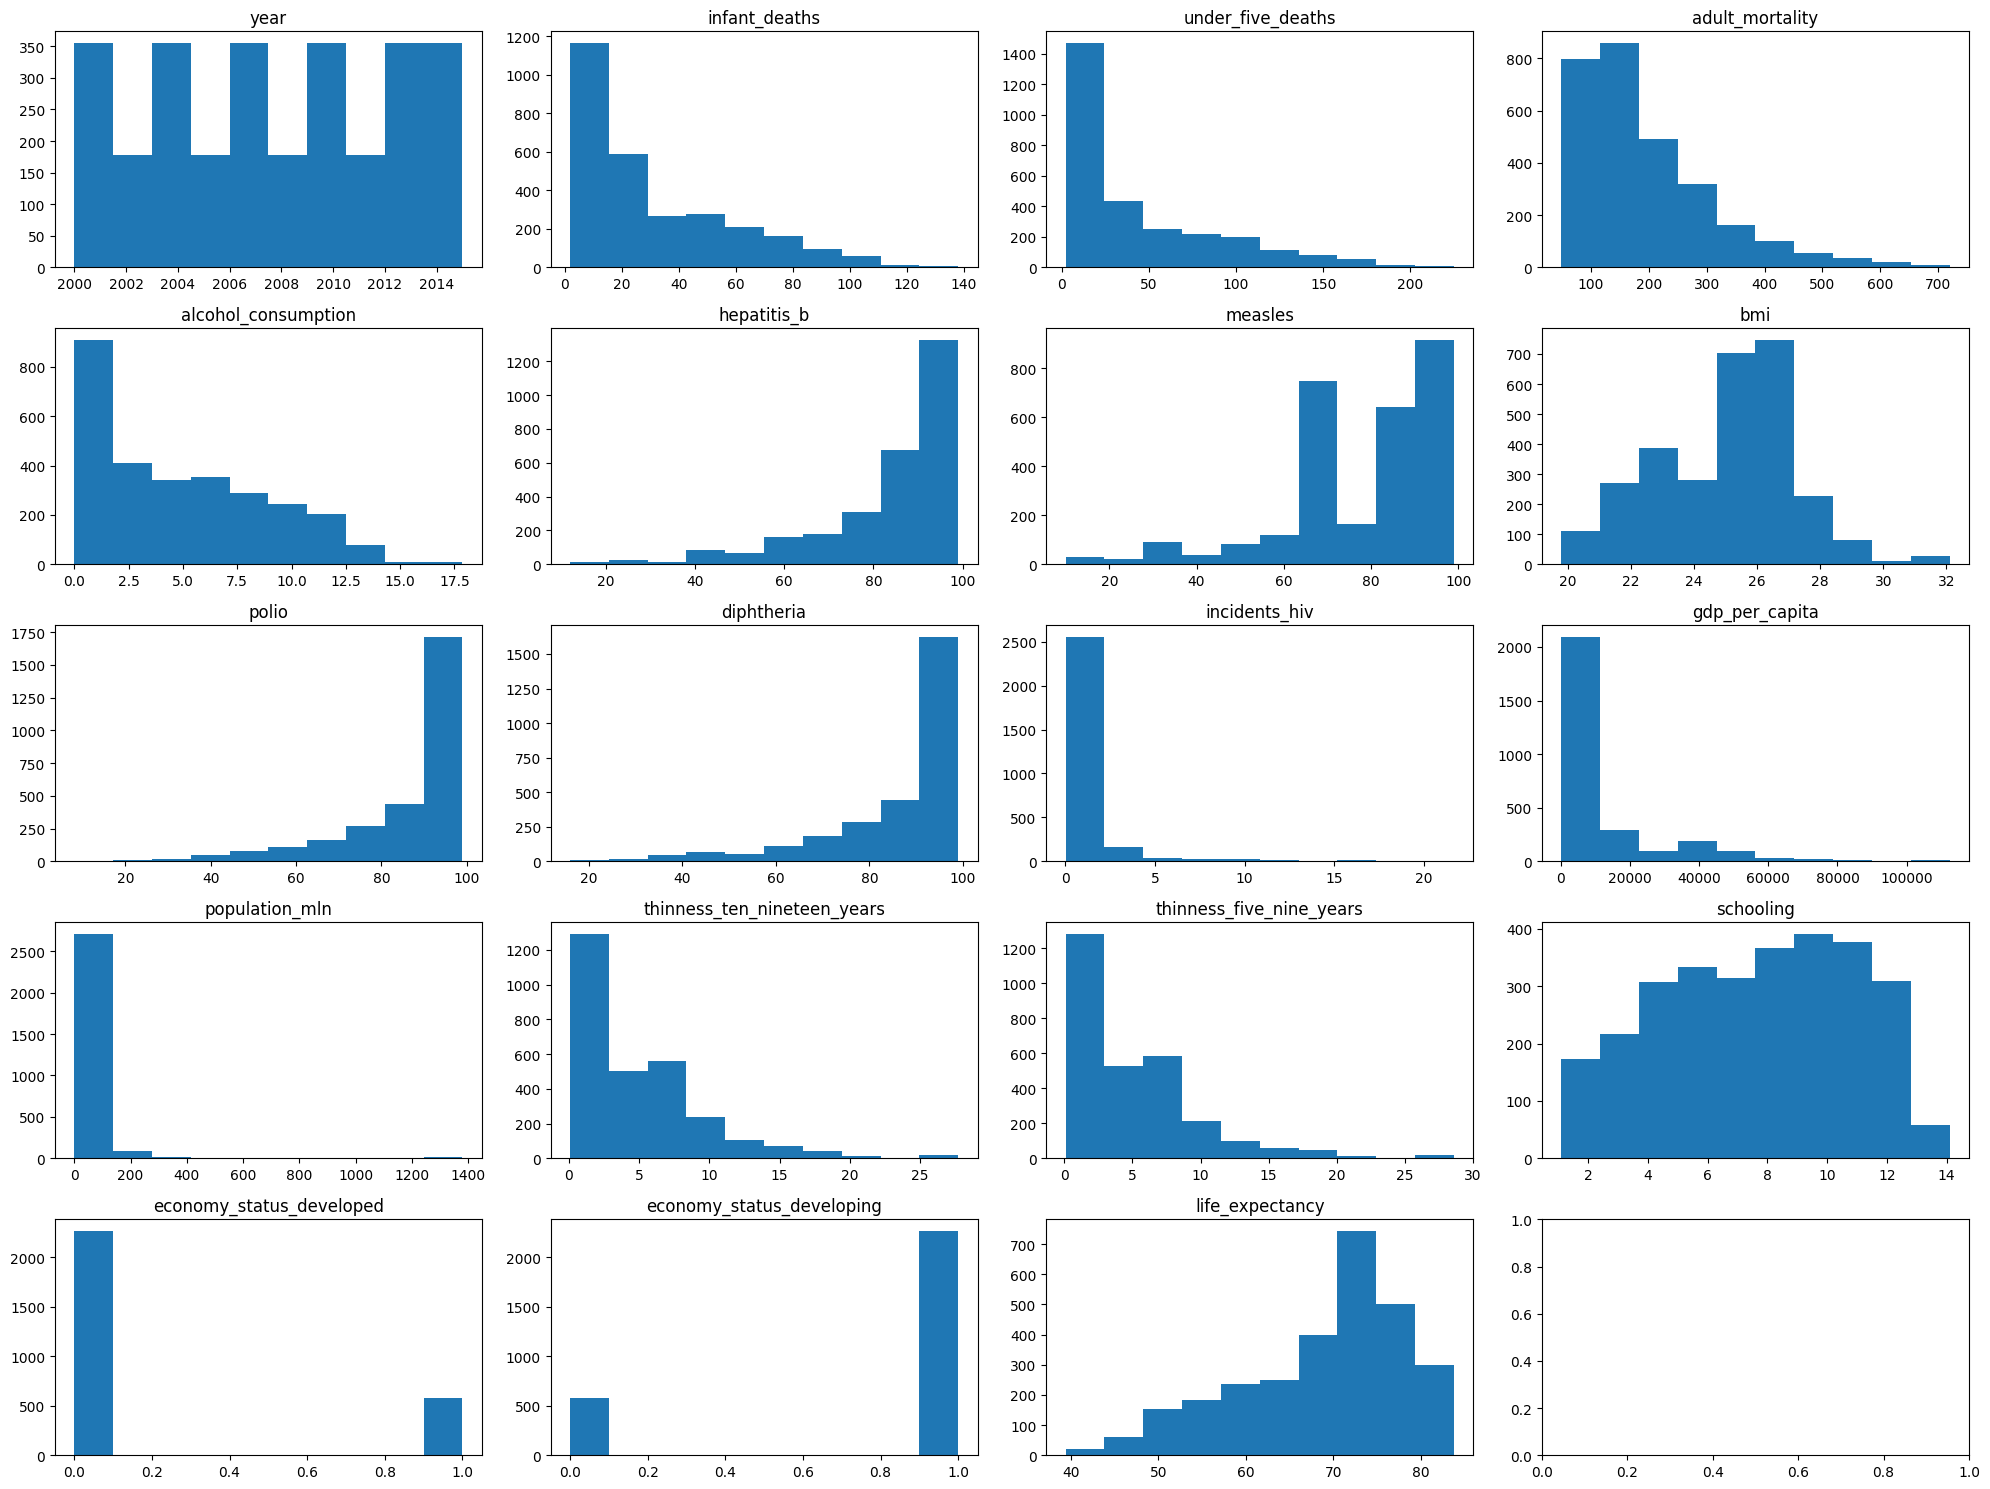

In [23]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 15))  
axes = axes.flatten()
for i, col in enumerate(numerical):
    axes[i].hist(data[col])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

Everything seems alright, theres no big outliers. We will normalize and scale the data later. Lets now count the number of developed and devloping countries. 

## Filling missing Values
Now that we have taken a look at our data, checked patterns, etc lets see what we can do about the missing values. First we must count how many values we are missing and where. 

In [24]:
data.isnull().sum()

country                        0
region                         0
year                           0
infant_deaths                  0
under_five_deaths              0
adult_mortality                0
alcohol_consumption            0
hepatitis_b                    0
measles                        0
bmi                            0
polio                          0
diphtheria                     0
incidents_hiv                  0
gdp_per_capita                 0
population_mln                 0
thinness_ten_nineteen_years    0
thinness_five_nine_years       0
schooling                      0
economy_status_developed       0
economy_status_developing      0
life_expectancy                0
dtype: int64

So there seems to be no missing values. On the kaggle site it mentioned this dataset updated missing values from the previous version however I still expected some missing values. Now I will just move onto data transformations.